In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize


In [2]:
train_dir="./chest_xray/train"
test_dir="./chest_xray/test"

In [3]:
(os.listdir(train_dir))

['.DS_Store', 'NORMAL', 'PNEUMONIA']

In [4]:
def read_image(folder):
    x=[]
    y=[]
    for nxtdir in os.listdir(folder):
        if not nxtdir.startswith('.'):
            if (nxtdir=='NORMAL'):
                label=0
            elif (nxtdir=='PNEUMONIA'):
                label=1
            else :
                label=2
                
            
            d=os.path.join(folder,nxtdir)
            for i in os.listdir(d):
                if not i.startswith('.'):
                    img=cv2.imread(os.path.join(d,i))
                    if img is not None:
                        img=skimage.transform.resize(img,(224,224,3))
                        a=np.asarray(img,dtype='float16')
                        x.append(a)
                        y.append(label)
    return np.array(x),np.array(y)
            
    

In [5]:
x_train,y_train=read_image(train_dir)

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [6]:
x_train.shape,y_train.shape

((5216, 224, 224, 3), (5216,))

In [7]:
unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))

[(0, 1341), (1, 3875)]


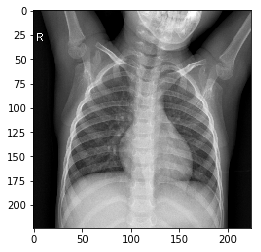

In [8]:
plt.imshow(x_train[0].astype('float32'))
plt.show()

In [9]:
x_test,y_test=read_image(test_dir)

In [10]:
x_test.shape,y_test.shape

((624, 224, 224, 3), (624,))

In [11]:
perm=np.random.permutation(len(x_train))
x_train=x_train[perm]
y_train=y_train[perm]


In [20]:
import keras
y_train_=keras.utils.to_categorical(y_train, num_classes=2)
y_test_=keras.utils.to_categorical(y_test, num_classes=2)

In [12]:
from keras.models import Model
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,GlobalAveragePooling2D,Activation,CuDNNGRU,Dropout,Reshape,concatenate,Lambda,BatchNormalization,SimpleRNN,LSTM,Reshape,GRU
from keras.layers.advanced_activations import PReLU,LeakyReLU,ELU
from keras.losses import binary_crossentropy,categorical_crossentropy
from keras.optimizers import Adam,SGD,RMSprop,Adagrad,Adamax,Nadam,Adadelta
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras import regularizers
from keras import backend as K 
import tensorflow as tf

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
def make_model():
    inputs=Input(shape=(224,224,3))
    l=inputs
    l=Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same')(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    l=Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same')(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    l=MaxPooling2D(pool_size=(2,2))(l)
    
    l=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    l=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    l=MaxPooling2D(pool_size=(2,2))(l)
    
    l=Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same')(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    l=Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same')(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    l=MaxPooling2D(pool_size=(2,2))(l)
    
    l=Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    l=Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    l=MaxPooling2D(pool_size=(2,2))(l)
    
    l=Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding='same')(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    l=Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding='same')(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    l=MaxPooling2D(pool_size=(2,2))(l)
    
    l=GlobalAveragePooling2D()(l)
    l=Dropout(0.4)(l)
    l=Dense(512,activation='relu')(l)
    l=Dropout(0.4)(l)
    l=Dense(256,activation='relu')(l)
    l=Dense(2,activation='sigmoid')(l)
    outputs=l
    return inputs,outputs

In [35]:
inputs,outputs=make_model()
model=Model(inputs=inputs,outputs=outputs)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_37 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
activation_37 (Activation)   (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_38 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
activation_38 (Activation)   (None, 224, 224, 32)      0         
__________

In [36]:
optim=Adam(1e-5)
#optim=SGD(1e-3)
loss=binary_crossentropy
model.compile(optim,loss,metrics=['accuracy'])


In [37]:
history=model.fit(x_train,y_train_,validation_data=(x_test,y_test_),epochs=20,batch_size=64,verbose=1)

Train on 5216 samples, validate on 624 samples
Epoch 1/20
5216/5216 [==============================] - 42s 8ms/step - loss: 0.4462 - acc: 0.7836 - val_loss: 0.7671 - val_acc: 0.6250
Epoch 2/20
5216/5216 [==============================] - 39s 7ms/step - loss: 0.2936 - acc: 0.8735 - val_loss: 1.4469 - val_acc: 0.6250
Epoch 3/20
5216/5216 [==============================] - 39s 7ms/step - loss: 0.2478 - acc: 0.8961 - val_loss: 2.0156 - val_acc: 0.6250
Epoch 4/20
5216/5216 [==============================] - 38s 7ms/step - loss: 0.2111 - acc: 0.9146 - val_loss: 2.1938 - val_acc: 0.6250
Epoch 5/20
5216/5216 [==============================] - 39s 7ms/step - loss: 0.1651 - acc: 0.9387 - val_loss: 2.1871 - val_acc: 0.6250
Epoch 6/20
5216/5216 [==============================] - 39s 7ms/step - loss: 0.1331 - acc: 0.9523 - val_loss: 2.0280 - val_acc: 0.6250
Epoch 7/20
5216/5216 [==============================] - 39s 7ms/step - loss: 0.1137 - acc: 0.9623 - val_loss: 1.2487 - val_acc: 0.6619
Epoch 8/

In [46]:
model.save_weights("./acc_8357.h5")

In [38]:
from sklearn.metrics import confusion_matrix, recall_score,precision_score

In [48]:
y_pred=model.predict(x_test)
conf_mat=confusion_matrix(np.argmax(y_test_,axis=1),np.argmax(y_pred,axis=1))
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)
print(tp/(tp+fp))
print("precision: ",float(float(tp)/(tp+fp)))
print("Recall: ",float(float(tp)/(tp+fn)))

[[138  96]
 [  6 384]]
0
('precision: ', 0.8)
('Recall: ', 0.9846153846153847)


In [52]:
f1_score= (2*0.8*0.98462)/(0.8+0.98462)
print("F1 Score :",f1_score)

('F1 Score :', 0.8827604756194596)
